# Harmonic oscillator potential orbit

Figure 7.1 from Chapter 7 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plots of obits in a harmonic oscillator potential with (x0,y0)=(1.5,1.0) and phase shifts $\Delta={0,\pi/4,\pi/2,3\pi/4,\pi}$

In [9]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [10]:
plotFile = 'Fig7_1.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Harmonic oscillator orbits

Harmonic oscillator orbits with phase $\Delta$ are described by
<dl>
    <dd>$x(t) = x_0 \cos ( \omega_0 t )$</dd>
    <dd>$y(t) = y_0 \cos ( \omega_0 t - \Delta )$</dd>
</dl>
 

Plot as lines with different styles:
 * $\Delta=0$ - solid
 * $\Delta=\pi/4$ - dotted
 * $\Delta=\pi/2$ - short dash
 * $\Delta=3\pi/4$ - long dash
 * $\Delta=\pi$ - heavy solid

In [11]:
theta = np.linspace(0.0,2*np.pi,301)

phaseList = ['0','pi/4','pi/2','3pi/4','pi']

# line styles used the full, numerical form

phaseLS = {'0':(0, ()),
           'pi/4':(0, (1, 1)),
           'pi/2':(0, (5, 5)),
           '3pi/4':(5, (10, 3)),
           'pi':(0, ())}

# amplitudes

x0 = 1.5
y0 = 1.0

# Compute x,y for each phase

x = {}
y = {}

for i in range(len(phaseList)):
    phase = i*0.25*np.pi
    x[phaseList[i]] = x0*np.cos(theta)
    y[phaseList[i]] = y0*np.cos(theta+phase)
    


### Figure 7.1

Single-panel, equal aspect plot sized to fit within a 4:3 aspect window.

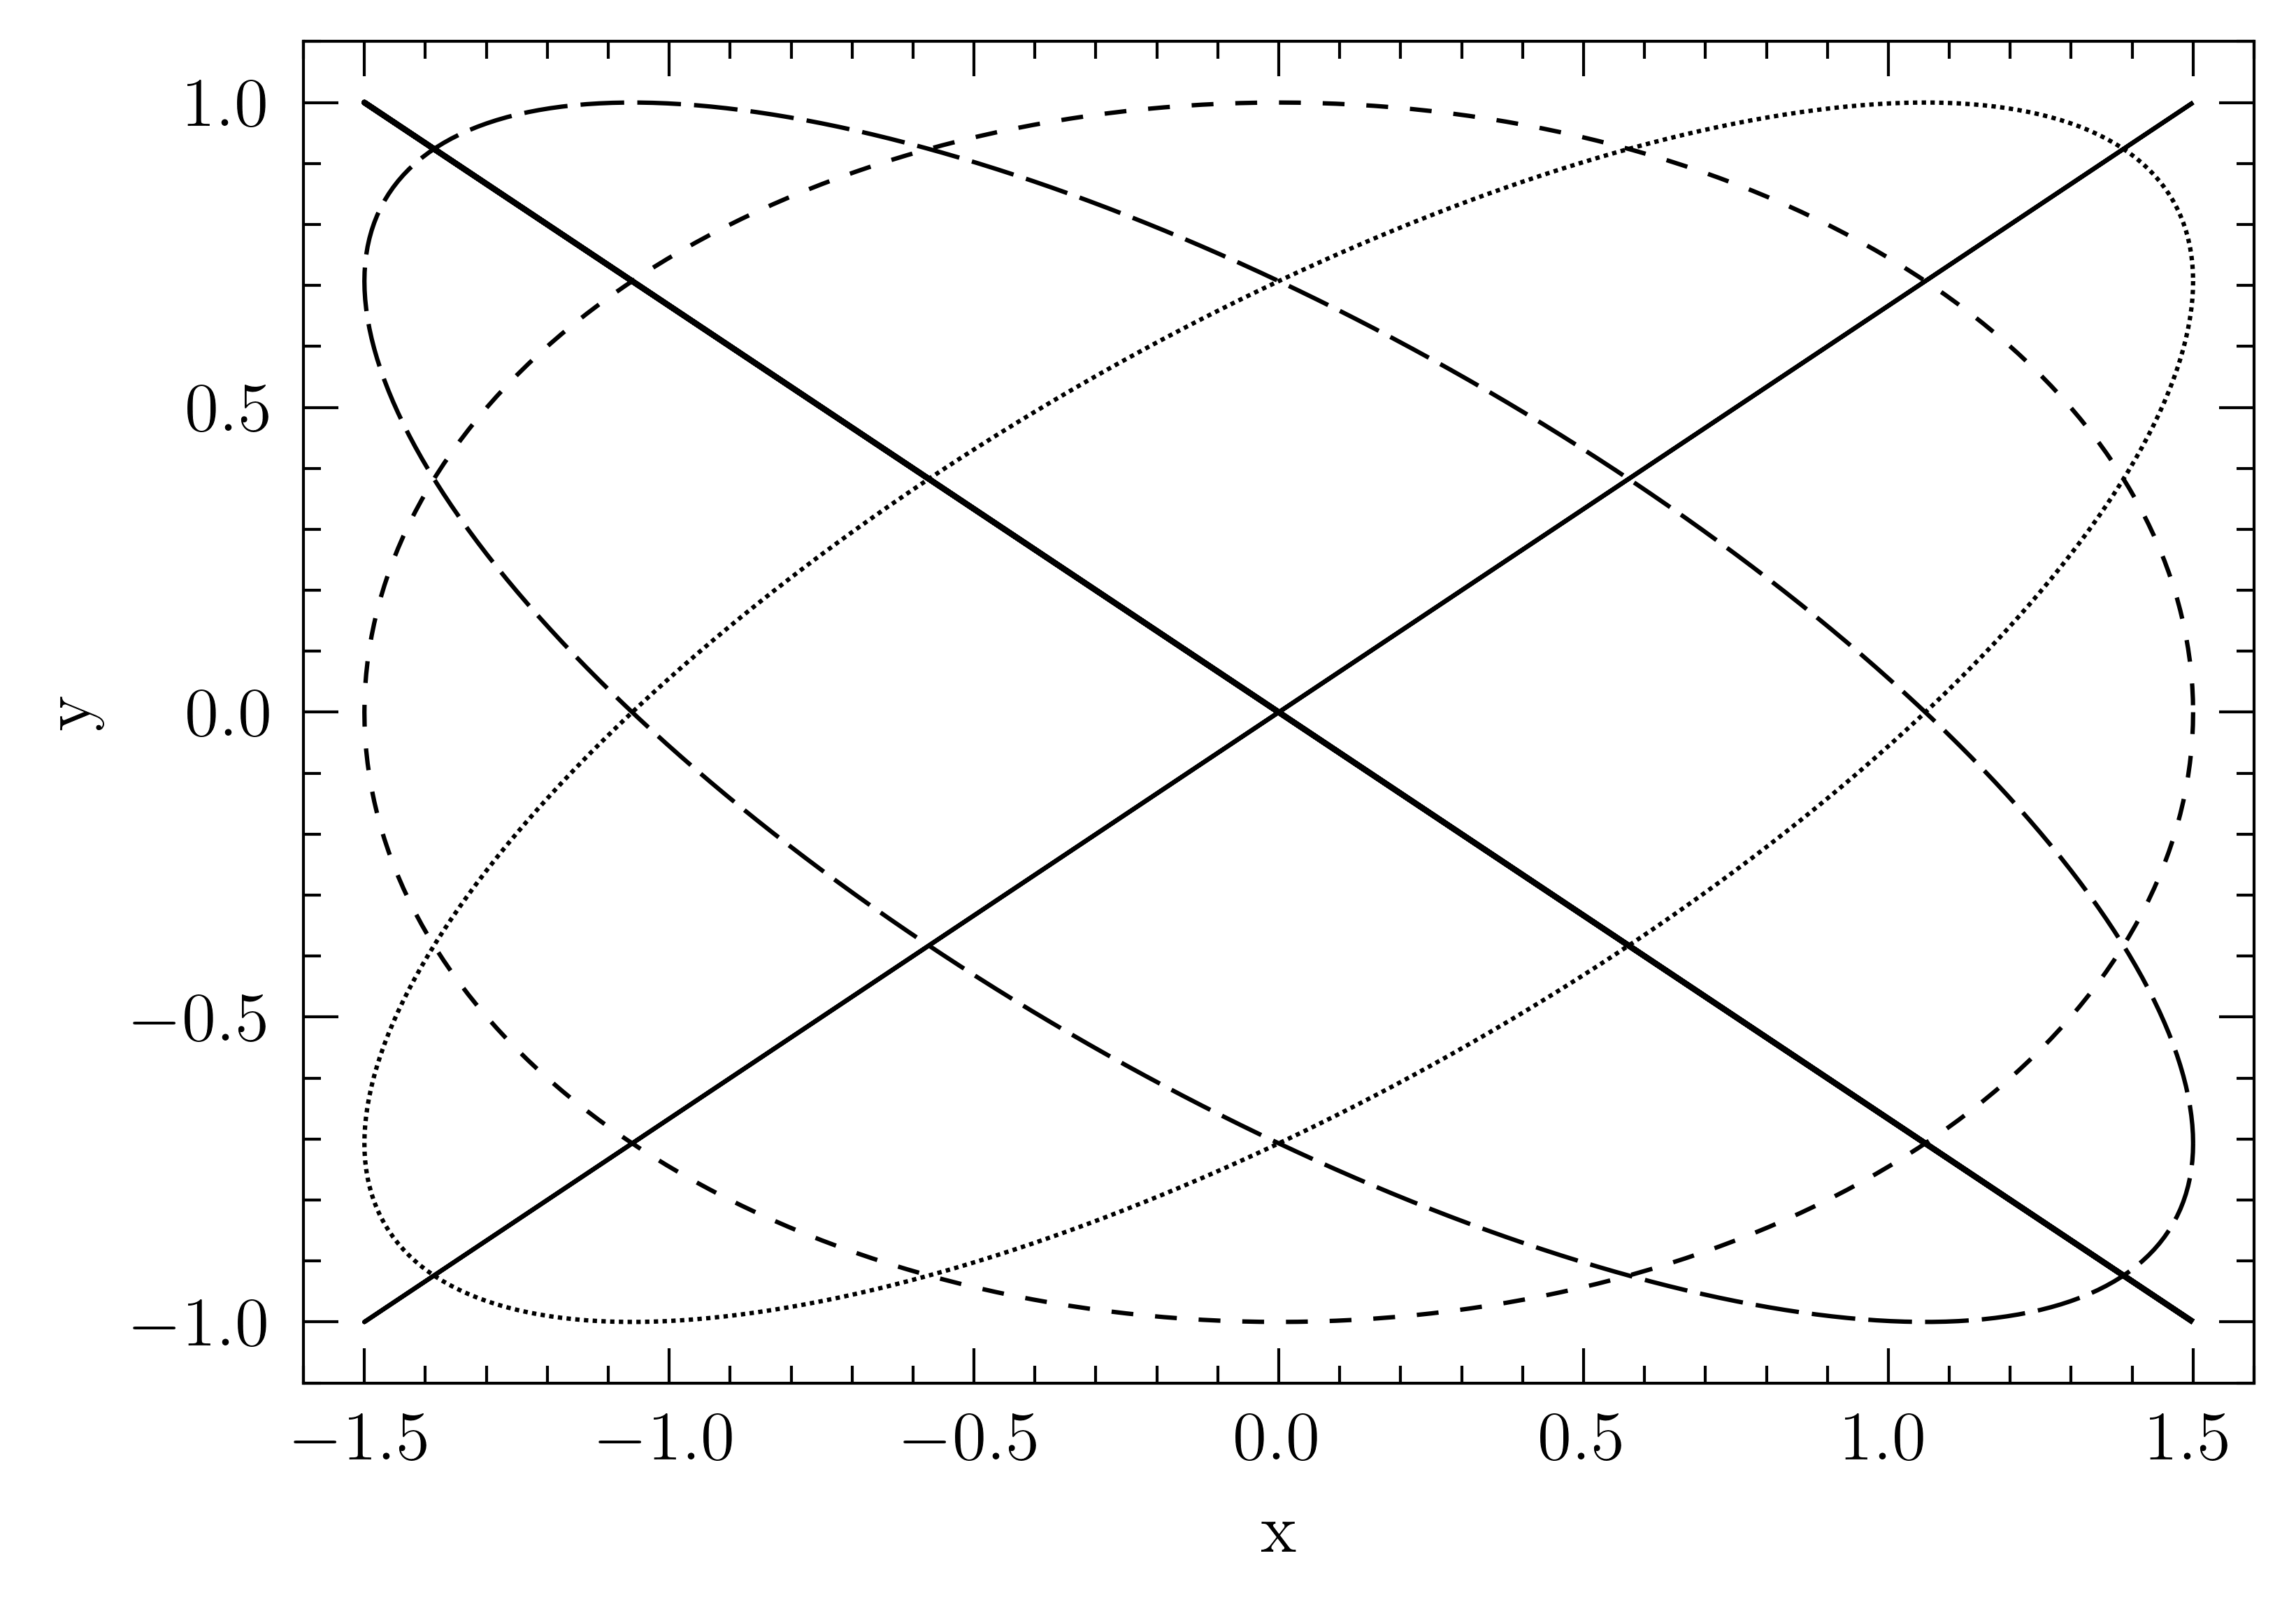

In [12]:
# plotting limits

xMin = -1.6
xMax = 1.6
yMin = -1.1
yMax = 1.1

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_aspect('equal')

# Limits

ax.set_xlim(xMin,xMax)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlabel(r'x',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel(r'y',fontsize=axisFontSize)

for phase in phaseList:
    if phase == 'pi':
        ax.plot(x[phase],y[phase],ls=phaseLS[phase],lw=1.0,color='black',zorder=10)
    else:
        ax.plot(x[phase],y[phase],ls=phaseLS[phase],lw=0.75,color='black',zorder=10)
        
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')